In [1]:
import pandas as pd
import os
import json
import glob

# 1. 수정된 폴더 경로 설정
# r"..." 문자열을 사용하여 윈도우 경로의 역슬래시(\)를 그대로 인식시킵니다.
path_reddit_x = r"C:\junwoo\AI_Project_01_Team6\data\Reddit_X raw data"
path_community = r"C:\junwoo\AI_Project_01_Team6\data\Community_data"

print("설정된 경로 확인:")
print(f"1. {path_reddit_x}")
print(f"2. {path_community}")

def load_data_from_folder(folder_path, folder_name):
    """
    특정 폴더에서 CSV와 JSON 파일을 찾아 데이터를 로드하는 함수
    """
    print(f"\n--- [{folder_name}] 폴더 데이터 로딩 중 ---")
    
    # CSV 파일 찾기
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
    df_list = []
    
    if csv_files:
        for file in csv_files:
            try:
                # 데이터 로드
                df = pd.read_csv(file)
                df_list.append(df)
                print(f"✅ CSV 로드 성공: {os.path.basename(file)} | 크기: {df.shape}")
            except Exception as e:
                print(f"❌ CSV 로드 실패: {os.path.basename(file)} | 에러: {e}")
    else:
        print(f"⚠️ {folder_name} 폴더에 CSV 파일이 없습니다.")

    # JSON 파일 찾기 (메타데이터 확인용)
    json_files = glob.glob(os.path.join(folder_path, "*.json"))
    if json_files:
        for file in json_files:
            try:
                with open(file, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    # total_urls 키가 있다면 출력 (업로드하신 파일 구조 반영)
                    if 'total_urls' in data:
                        print(f"ℹ️ JSON 메타데이터 ({os.path.basename(file)}): 총 URL 수 = {data['total_urls']}")
            except:
                pass

    # 해당 폴더의 모든 CSV 병합
    if df_list:
        combined_df = pd.concat(df_list, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()

# 2. 각 폴더에서 데이터 로드
df_part1 = load_data_from_folder(path_reddit_x, "Reddit_X raw data")
df_part2 = load_data_from_folder(path_community, "Community_data")

# 3. 전체 데이터 통합 및 중복 제거
print("\n" + "="*40)
print("=== 전체 데이터 통합 결과 ===")

# 두 데이터프레임 합치기
all_data = pd.concat([df_part1, df_part2], ignore_index=True)

if not all_data.empty:
    initial_count = len(all_data)
    
    # 'url' 컬럼 기준으로 중복 제거 (동일한 게시글이 중복 수집되었을 경우 대비)
    # subset에 중복 기준 컬럼을 지정합니다. (예: url, title 등)
    if 'url' in all_data.columns:
        all_data_unique = all_data.drop_duplicates(subset=['url'], keep='last')
    else:
        all_data_unique = all_data.drop_duplicates()
        
    final_count = len(all_data_unique)
    
    print(f"총 수집된 데이터 행(Row) 수: {initial_count}")
    print(f"중복 제거 후 유니크 데이터 수: {final_count}")
    print(f"데이터 컬럼(Column) 목록:\n{list(all_data_unique.columns)}")
    
    # 4. 데이터 미리보기
    print("\n=== 데이터 보기 ===")
    display(all_data_unique)
    
    # 5. 플랫폼별 데이터 분포 확인
    if 'platform' in all_data_unique.columns:
        print("\n=== 플랫폼별 수집 개수 ===")

설정된 경로 확인:
1. C:\junwoo\AI_Project_01_Team6\data\Reddit_X raw data
2. C:\junwoo\AI_Project_01_Team6\data\Community_data

--- [Reddit_X raw data] 폴더 데이터 로딩 중 ---
✅ CSV 로드 성공: SNS_MASTER_URLS_FINAL.csv | 크기: (53, 11)
ℹ️ JSON 메타데이터 (SNS_COLLECTION_SUMMARY.json): 총 URL 수 = 53

--- [Community_data] 폴더 데이터 로딩 중 ---
✅ CSV 로드 성공: 01_SNS_URL_DATABASE.csv | 크기: (88, 11)
ℹ️ JSON 메타데이터 (00_COLLECTION_METADATA.json): 총 URL 수 = 88

=== 전체 데이터 통합 결과 ===
총 수집된 데이터 행(Row) 수: 141
중복 제거 후 유니크 데이터 수: 88
데이터 컬럼(Column) 목록:
['platform', 'subreddit', 'url', 'title', 'date_ref', 'theme', 'engagement_est', 'author', 'collection_date', 'data_source', 'status']

=== 데이터 보기 ===


,platform,subreddit,url,title,date_ref,theme,engagement_est,author,collection_date,data_source,status
53,Reddit,r/CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,$500M liquidated overnight. When did we normal...,October 2025,Liquidation normalization,High,NaN,2026-01-30,Firecrawl Search,URL_Collected
54,Reddit,r/CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,Does anyone know how historic this crash was?,October 2025,Historical comparison,High,NaN,2026-01-30,Firecrawl Search,URL_Collected
55,Reddit,r/CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,Bitcoin risks '20-30%' drop as crypto markets ...,October 2025,Price prediction,Medium,NaN,2026-01-30,Firecrawl Search,URL_Collected
56,Reddit,r/CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,$344430000 In Short Positions Has Been Liquidated,"October 11, 2025",Short squeeze,High,NaN,2026-01-30,Firecrawl Search,URL_Collected
57,Reddit,r/CryptoCurrency,https://www.reddit.com/r/CryptoCurrency/commen...,"Daily Crypto Discussion - October 14, 2025","October 14, 2025",Daily discussion,Very High,NaN,2026-01-30,Firecrawl Search,URL_Collected
...,...,...,...,...,...,...,...,...,...,...,...
136,News,NaN,https://www.ainvest.com/news/bitcoin-90-000-re...,Bitcoin's $90K Rejection - Liquidity 40% Below...,2026,Liquidity crisis aftermath,High,AIInvest,2026-01-30,Firecrawl Search - Final Expansion,URL_Collected
137,News,NaN,https://www.forbes.com/sites/greatspeculations...,Bitcoin Downside: The $20B October Liquidation...,January 2026,Long-term crash impact,High,Forbes,2026-01-30,Firecrawl Search - Final Expansion,URL_Collected
138,YouTube,NaN,https://www.youtube.com/watch?v=z6WZCklalmc,Warning: Will Crypto Crash In September 2025?,September 2025,Pre-crash warning,Medium,Crypto Analysis,2026-01-30,Firecrawl Search - Final Expansion,URL_Collected
139,News,NaN,https://m.economictimes.com/news/international...,"BTC Bitcoin Price Sept 22, 2025 - Crash Warning","September 22, 2025",Pre-crash market warning,High,Economic Times,2026-01-30,Firecrawl Search - Final Expansion,URL_Collected



=== 플랫폼별 수집 개수 ===


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import json
import re
from urllib.parse import urlparse

# ==========================================
# 1. 설정 및 데이터 로드
# ==========================================
# 사용자 경로 (이전에 합친 파일이 있다고 가정, 없으면 다시 로드 로직 사용)
# 여기서는 예시로 로드된 df를 가정하거나, 파일 경로를 지정하세요.
# df = pd.read_csv('combined_url_data.csv') # 앞 단계에서 만든 파일

# (테스트를 위해 앞선 코드의 결과를 그대로 쓴다고 가정합니다)
# 만약 앞 셀의 'all_data_unique' 변수가 살아있다면 그걸 쓰시고, 아니면 아래 경로를 수정하세요.
input_csv_path = r"C:\junwoo\AI_Project_01_Team6\data\Reddit_X raw data\SNS_MASTER_URLS_FINAL.csv" # 예시

try:
    df = pd.read_csv(input_csv_path)
    # 중복 제거
    df = df.drop_duplicates(subset=['url'], keep='last')
    print(f"🎯 분석 대상 URL: {len(df)}개")
except:
    print("CSV 파일을 찾을 수 없어 빈 프레임으로 시작합니다 (경로 확인 필요)")
    df = pd.DataFrame(columns=['platform', 'url', 'title'])

# 수집된 데이터를 저장할 리스트
expanded_dataset = []

# ==========================================
# 2. 핵심 로직: 플랫폼별 추출기 (Extractors)
# ==========================================

# [헤더 설정] 봇 차단 방지용 User-Agent
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

def extract_reddit_deep(row):
    """
    Reddit JSON 트릭 사용: API Key 없이 .json을 URL 뒤에 붙여 구조화된 데이터(본문+댓글)를 가져옴.
    가장 강력한 데이터 증폭 구간.
    """
    url = row['url']
    if not url.endswith('/'):
        url += '/'
    json_url = url + ".json"
    
    print(f"   Trying Reddit JSON: {json_url}")
    
    try:
        r = requests.get(json_url, headers=headers, timeout=10)
        if r.status_code != 200:
            return 0
            
        data = r.json()
        count = 0
        
        # 1. 본문 (Original Post)
        post_data = data[0]['data']['children'][0]['data']
        expanded_dataset.append({
            'parent_url': row['url'],
            'platform': 'Reddit',
            'type': 'Post',
            'author': post_data.get('author', 'unknown'),
            'content': post_data.get('selftext', '') or post_data.get('title', ''),
            'date_utc': post_data.get('created_utc', ''),
            'score': post_data.get('score', 0)
        })
        count += 1
        
        # 2. 댓글 (Comments) - 재귀적으로 파싱할 수도 있지만 여기선 1 depth만 강력하게 수집
        comments_data = data[1]['data']['children']
        for comment in comments_data:
            c_data = comment.get('data', {})
            body = c_data.get('body', '')
            
            if body and body != '[deleted]':
                expanded_dataset.append({
                    'parent_url': row['url'],
                    'platform': 'Reddit',
                    'type': 'Comment',
                    'author': c_data.get('author', 'unknown'),
                    'content': body,
                    'date_utc': c_data.get('created_utc', ''),
                    'score': c_data.get('score', 0)
                })
                count += 1
                
        return count
    except Exception as e:
        print(f"   Error Reddit: {e}")
        return 0

def extract_general_web(row):
    """
    News, Medium 등 일반 웹사이트 본문 추출 (BeautifulSoup)
    """
    url = row['url']
    try:
        r = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(r.text, 'html.parser')
        
        # 제목
        title = soup.title.string if soup.title else row.get('title', '')
        
        # 본문 (P 태그 위주)
        paragraphs = soup.find_all('p')
        full_text = " ".join([p.get_text() for p in paragraphs if len(p.get_text()) > 20])
        
        if len(full_text) > 50:
            expanded_dataset.append({
                'parent_url': url,
                'platform': row.get('platform', 'Web'),
                'type': 'Article_Body',
                'author': row.get('author', 'unknown'),
                'content': full_text,
                'date_utc': 'Check Original',
                'score': 0
            })
            return 1
        return 0
    except Exception as e:
        return 0

# ==========================================
# 3. 실행 루프 (Execution Loop)
# ==========================================

print("🚀 데이터 딥 다이브(Deep Dive) 시작...")
print("주의: 이 작업은 시간이 소요됩니다. (URL당 1~2초)")

total_new_records = 0

for idx, row in df.iterrows():
    platform = str(row.get('platform', '')).lower()
    url = row['url']
    
    print(f"[{idx+1}/{len(df)}] Processing: {platform} - {url[:40]}...")
    
    added_count = 0
    
    # 1. Reddit 처리 (가장 확실한 물량)
    if 'reddit' in platform or 'reddit.com' in url:
        added_count = extract_reddit_deep(row)
        
    # 2. X (Twitter) 처리
    # 주의: Twitter는 Selenium 없이는 스크래핑이 매우 어렵습니다. 
    # API 키 없이는 requests로 불가. 여기서는 'URL 정보'만이라도 확실히 포맷팅해둡니다.
    elif 'twitter' in platform or 'x.com' in url:
        # 트위터는 내용 접근이 제한적이므로 원본 타이틀을 데이터로 확보
        expanded_dataset.append({
            'parent_url': url,
            'platform': 'X (Twitter)',
            'type': 'Post_Summary',
            'author': row.get('author', 'unknown'),
            'content': row.get('title', 'Content Protected'), # 제목을 내용으로 사용
            'date_utc': row.get('date_ref', ''),
            'score': 0
        })
        added_count = 1
        
    # 3. 기타 웹 (News, Medium)
    else:
        added_count = extract_general_web(row)
        
    total_new_records += added_count
    
    # 서버 부하 방지용 딜레이
    time.sleep(random.uniform(0.5, 1.5))

# ==========================================
# 4. 결과 저장 및 확인
# ==========================================

df_expanded = pd.DataFrame(expanded_dataset)

print("\n" + "="*40)
print(f"✨ 추출 완료! 총 {total_new_records}개의 상세 데이터 확보")
print("="*40)

if not df_expanded.empty:
    print(df_expanded['platform'].value_counts())
    
    # CSV 저장
    output_name = "SNS_DATA_EXPANDED_RESULTS.csv"
    df_expanded.to_csv(output_name, index=False, encoding='utf-8-sig')
    print(f"\n📂 파일 저장 완료: {output_name}")
    
    # 미리보기
    display(df_expanded.head())
else:
    print("데이터 추출 실패. 인터넷 연결이나 URL을 확인해주세요.")

🎯 분석 대상 URL: 53개
🚀 데이터 딥 다이브(Deep Dive) 시작...
주의: 이 작업은 시간이 소요됩니다. (URL당 1~2초)
[1/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://www.reddit.com/r/CryptoCurrency/comments/1qi6689/500m_liquidated_overnight_when_did_we_normalize/.json
[2/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://www.reddit.com/r/CryptoCurrency/comments/1o3ishj/does_anyone_know_how_historic_this_crash_was/.json
[3/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://www.reddit.com/r/CryptoCurrency/comments/1ok2hxm/bitcoin_risks_2030_drop_as_crypto_markets/.json
[4/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://www.reddit.com/r/CryptoCurrency/comments/1q4v6jh/344430000_in_short_positions_has_been_liquidated/.json
[5/53] Processing: reddit - https://www.reddit.com/r/CryptoCurrency/...
   Trying Reddit JSON: https://ww

,parent_url,platform,type,author,content,date_utc,score
0,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Post,reogin,"Woke up this morning, opened crypto Twitter — ...",1768927473.0,46
1,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,Revolutionary-Cup78,Have you seen the amount of leveraged degenin ...,1769041958.0,1
2,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,JakRenden2,Gamblers be gambling,1768986430.0,1
3,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,kobriks,AI slop,1768984469.0,1
4,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,DubT1484,What percentage of traders are profitable?\n\n...,1768972865.0,2


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import json
import os

# ==========================================
# 1. 경로 설정 (입력 및 출력)
# ==========================================

# 원본 데이터 경로
input_path_1 = r"C:\junwoo\AI_Project_01_Team6\data\Reddit_X raw data\SNS_MASTER_URLS_FINAL.csv"
input_path_2 = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\01_SNS_URL_DATABASE.csv"

# [중요] 결과물을 저장할 폴더 및 파일명
output_folder = r"C:\junwoo\AI_Project_01_Team6\data"
output_filename = "SNS_DEEP_DIVE(1).csv"
output_full_path = os.path.join(output_folder, output_filename)

# 폴더 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ==========================================
# 2. 데이터 로드 및 병합
# ==========================================
def load_data():
    dfs = []
    if os.path.exists(input_path_1):
        dfs.append(pd.read_csv(input_path_1))
    if os.path.exists(input_path_2):
        dfs.append(pd.read_csv(input_path_2))
    
    if dfs:
        full_df = pd.concat(dfs, ignore_index=True)
        full_df = full_df.drop_duplicates(subset=['url'], keep='last')
        return full_df
    else:
        return pd.DataFrame()

df = load_data()
print(f"🎯 [준비 완료] 분석 대상 URL: {len(df)}개")

# 확장된 데이터를 담을 리스트
expanded_data = []

# ==========================================
# 3. 크롤링 엔진 (Deep Dive Engine)
# ==========================================
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

def get_reddit_comments(row):
    """Reddit JSON 트릭: 댓글 폭포수 수집"""
    url = row['url']
    json_url = url.rstrip('/') + ".json"
        
    try:
        time.sleep(random.uniform(0.3, 0.7)) # 속도 약간 상향
        resp = requests.get(json_url, headers=headers, timeout=10)
        
        if resp.status_code != 200:
            return 0
            
        data = resp.json()
        count = 0
        
        # 1. 본문 (Original Post)
        try:
            post = data[0]['data']['children'][0]['data']
            expanded_data.append({
                'source_url': url,
                'platform': 'Reddit',
                'type': 'Post',
                'author': post.get('author', 'unknown'),
                'content': post.get('selftext', '') or post.get('title', ''),
                'date_raw': post.get('created_utc', ''),
                'engagement': post.get('score', 0)
            })
            count += 1
        except:
            pass

        # 2. 댓글 (Comments) - 데이터의 바다
        if len(data) > 1:
            comments = data[1]['data']['children']
            for c in comments:
                c_data = c.get('data', {})
                body = c_data.get('body', '')
                if body and body not in ['[deleted]', '[removed]']:
                    expanded_data.append({
                        'source_url': url,
                        'platform': 'Reddit',
                        'type': 'Comment',
                        'author': c_data.get('author', 'unknown'),
                        'content': body,
                        'date_raw': c_data.get('created_utc', ''),
                        'engagement': c_data.get('score', 0)
                    })
                    count += 1
        return count
    except:
        return 0

def get_general_content(row):
    """일반 웹사이트 본문 추출"""
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        paragraphs = soup.find_all('p')
        content = " ".join([p.get_text().strip() for p in paragraphs if len(p.get_text()) > 20])
        
        if len(content) > 50:
            expanded_data.append({
                'source_url': url,
                'platform': row.get('platform', 'Web'),
                'type': 'Article',
                'author': row.get('author', 'unknown'),
                'content': content,
                'date_raw': row.get('date_ref', ''),
                'engagement': 0
            })
            return 1
        return 0
    except:
        return 0

# ==========================================
# 4. 실행 및 실시간 출력
# ==========================================
print("\n💰 데이터 채굴 시작! (100억 개의 지폐 뭉치가 쏟아지듯 데이터가 모입니다...)")
total_count = 0

for idx, row in df.iterrows():
    platform = str(row.get('platform', '')).lower()
    url = row['url']
    
    cnt = 0
    if 'reddit' in platform or 'reddit.com' in url:
        cnt = get_reddit_comments(row)
    elif 'twitter' in platform or 'x.com' in url:
        expanded_data.append({
            'source_url': url,
            'platform': 'X (Twitter)',
            'type': 'Post_Summary',
            'author': row.get('author', ''),
            'content': row.get('title', ''),
            'date_raw': row.get('date_ref', ''),
            'engagement': 0
        })
        cnt = 1
    else:
        cnt = get_general_content(row)
    
    total_count += cnt
    # 진행 상황을 한 줄로 덮어쓰며 출력 (깔끔하게)
    print(f"\r🚀 진행률 [{idx+1}/{len(df)}] | 현재 확보된 데이터: {total_count}개 | 방금 처리: {platform}", end="")

print("\n\n" + "="*60)
print(f"🌊 [완료] 100억 개의 지폐 뭉치처럼 데이터가 쏟아졌습니다!")
print(f"📊 최종 확보된 데이터 총 개수: {total_count} 건")
print("="*60)

# ==========================================
# 5. 저장 및 결과 즉시 출력
# ==========================================
final_df = pd.DataFrame(expanded_data)

if not final_df.empty:
    # 1. 파일 저장
    final_df.to_csv(output_full_path, index=False, encoding='utf-8-sig')
    print(f"\n💾 파일 저장 완료: {output_full_path}")
    
    # 2. 데이터 정보 출력
    print("\n[데이터셋 정보]")
    final_df.info()
    
    # 3. 플랫폼별 분포
    print("\n[플랫폼별 데이터 수]")
    print(final_df['platform'].value_counts())
    
    # 4. 실제 데이터 내용 미리보기 (상위 5개)
    print("\n👀 [데이터 미리보기 - Head]")
    display(final_df.head())
    
    # 5. 무작위 샘플 출력 (내용 확인용)
    print("\n🎲 [무작위 샘플 데이터 3개 - 실제 텍스트 내용]")
    try:
        sample_df = final_df.sample(3)
        for i, (idx, row) in enumerate(sample_df.iterrows()):
            print(f"\n--- Sample {i+1} ({row['platform']} / {row['type']}) ---")
            print(f"작성자: {row['author']}")
            print(f"내용: {str(row['content'])[:200]}...") # 내용이 길면 200자에서 자름
    except:
        pass
        
else:
    print("❌ 수집된 데이터가 없습니다. URL 상태나 네트워크를 확인해주세요.")

🎯 [준비 완료] 분석 대상 URL: 88개

💰 데이터 채굴 시작! (100억 개의 지폐 뭉치가 쏟아지듯 데이터가 모입니다...)
🚀 진행률 [141/88] | 현재 확보된 데이터: 1003개 | 방금 처리: newsubealk

🌊 [완료] 100억 개의 지폐 뭉치처럼 데이터가 쏟아졌습니다!
📊 최종 확보된 데이터 총 개수: 1003 건

💾 파일 저장 완료: C:\junwoo\AI_Project_01_Team6\data\SNS_DEEP_DIVE(1).csv

[데이터셋 정보]
<class 'pandas.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   source_url  1003 non-null   str   
 1   platform    1003 non-null   str   
 2   type        1003 non-null   str   
 3   author      1003 non-null   str   
 4   content     1003 non-null   str   
 5   date_raw    1003 non-null   object
 6   engagement  1003 non-null   int64 
dtypes: int64(1), object(1), str(5)
memory usage: 55.0+ KB

[플랫폼별 데이터 수]
platform
Reddit         950
X (Twitter)     34
News             8
Substack         6
Medium           5
Name: count, dtype: int64

👀 [데이터 미리보기 - Head]


,source_url,platform,type,author,content,date_raw,engagement
0,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Post,reogin,"Woke up this morning, opened crypto Twitter — ...",1768927473.0,50
1,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,Revolutionary-Cup78,Have you seen the amount of leveraged degenin ...,1769041958.0,1
2,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,JakRenden2,Gamblers be gambling,1768986430.0,1
3,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,kobriks,AI slop,1768984469.0,1
4,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,DubT1484,What percentage of traders are profitable?\n\n...,1768972865.0,2



🎲 [무작위 샘플 데이터 3개 - 실제 텍스트 내용]

--- Sample 1 (Reddit / Comment) ---
작성자: devCheckingIn
내용: BNB gonna flip ETH with this "one weird trick":  Binance endlessly fraud-liquidating all of its traders and taking the billions and pumping them into BNB.  It's like an infinite money glitch....

--- Sample 2 (Reddit / Comment) ---
작성자: linknukem28
내용: It’s been running hot for over 7 days it’s gotta relax a little...

--- Sample 3 (Reddit / Comment) ---
작성자: Omarkhayyamsnotes
내용: Yeah some of my coins dropped by 75%. Absolute bloodbath. Haven't seen anything like this since 21 and this was worse than that...


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import os
import json
import re

# ==========================================
# 1. 경로 설정 (입력/출력)
# ==========================================
input_path_1 = r"C:\junwoo\AI_Project_01_Team6\data\Reddit_X raw data\SNS_MASTER_URLS_FINAL.csv"
input_path_2 = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\01_SNS_URL_DATABASE.csv"

output_folder = r"C:\junwoo\AI_Project_01_Team6\data"
output_filename = "SNS_DEEP_DIVE(NoInstall).csv"
output_full_path = os.path.join(output_folder, output_filename)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ==========================================
# 2. 데이터 로드
# ==========================================
def load_data():
    dfs = []
    if os.path.exists(input_path_1): dfs.append(pd.read_csv(input_path_1))
    if os.path.exists(input_path_2): dfs.append(pd.read_csv(input_path_2))
    
    if dfs:
        full_df = pd.concat(dfs, ignore_index=True)
        return full_df.drop_duplicates(subset=['url'], keep='last')
    return pd.DataFrame()

df = load_data()
print(f"🎯 [준비 완료] 분석 대상 URL: {len(df)}개")

# 데이터 저장소
expanded_data = []

# ==========================================
# 3. 설치 불필요 크롤링 엔진 (Pure Python)
# ==========================================
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

# --- 1. Reddit (JSON Trick: 설치 없이 댓글 100개 긁기) ---
def get_reddit_pure(row):
    url = row['url']
    json_url = url.rstrip('/') + ".json"
    
    try:
        time.sleep(random.uniform(0.5, 1.0))
        resp = requests.get(json_url, headers=headers, timeout=10)
        
        if resp.status_code != 200: return 0
        data = resp.json()
        count = 0
        
        # 본문
        post = data[0]['data']['children'][0]['data']
        expanded_data.append({
            'source_url': url, 'platform': 'Reddit', 'type': 'Post',
            'author': post.get('author', 'unknown'),
            'content': post.get('selftext', '') or post.get('title', ''),
            'date': post.get('created_utc', ''), 'engagement': post.get('score', 0)
        })
        count += 1
        
        # 댓글 (여기가 핵심)
        if len(data) > 1:
            for c in data[1]['data']['children']:
                c_data = c.get('data', {})
                body = c_data.get('body', '')
                if body and body not in ['[deleted]', '[removed]']:
                    expanded_data.append({
                        'source_url': url, 'platform': 'Reddit', 'type': 'Comment',
                        'author': c_data.get('author', 'unknown'),
                        'content': body,
                        'date': c_data.get('created_utc', ''),
                        'engagement': c_data.get('score', 0)
                    })
                    count += 1
        return count
    except:
        return 0

# --- 2. YouTube (Title & Meta: API 없이 HTML 파싱) ---
def get_youtube_pure(row):
    # YouTube 댓글은 동적이라 requests로는 어렵습니다.
    # 대신 영상 설명(Description)과 제목을 확실하게 긁어옵니다.
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        
        title = soup.find('title').get_text() if soup.find('title') else row.get('title', '')
        # 메타 태그에서 설명 가져오기
        desc = soup.find('meta', attrs={'name': 'description'})
        content = desc['content'] if desc else title
        
        expanded_data.append({
            'source_url': url, 'platform': 'YouTube', 'type': 'Video_Meta',
            'author': row.get('author', ''), 'content': content,
            'date': row.get('date_ref', ''), 'engagement': 0
        })
        return 1
    except:
        # 실패 시 기본 정보만 저장
        expanded_data.append({
            'source_url': url, 'platform': 'YouTube', 'type': 'Video_Meta',
            'author': row.get('author', ''), 'content': row.get('title', ''),
            'date': row.get('date_ref', ''), 'engagement': 0
        })
        return 1

# --- 3. X / Twitter (안전하게 제목 활용) ---
def get_twitter_pure(row):
    # 트위터는 requests로 접근 불가하므로, 이미 확보된 '제목'을 데이터로 씁니다.
    url = row['url']
    expanded_data.append({
        'source_url': url, 'platform': 'X (Twitter)', 'type': 'Post_Summary',
        'author': row.get('author', ''), 'content': row.get('title', ''),
        'date': row.get('date_ref', ''), 'engagement': 0
    })
    return 1

# --- 4. General Web (뉴스/블로그) ---
def get_general_pure(row):
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        
        # P 태그 텍스트 추출
        text_blocks = [p.get_text().strip() for p in soup.find_all('p') if len(p.get_text()) > 30]
        content = " ".join(text_blocks)
        
        if len(content) > 50:
            expanded_data.append({
                'source_url': url, 'platform': 'Web', 'type': 'Article',
                'author': row.get('author', 'unknown'), 'content': content,
                'date': row.get('date_ref', ''), 'engagement': 0
            })
            return 1
        return 0
    except:
        return 0

# ==========================================
# 4. 실행 및 출력
# ==========================================
print("\n🚀 [No-Install Mode] 데이터 수집 시작...")
total_count = 0

for idx, row in df.iterrows():
    platform = str(row.get('platform', '')).lower()
    url = row['url']
    
    cnt = 0
    # 플랫폼별 분기
    if 'reddit' in platform or 'reddit.com' in url:
        cnt = get_reddit_pure(row)
    elif 'youtube' in platform or 'youtube.com' in url:
        cnt = get_youtube_pure(row)
    elif 'twitter' in platform or 'x.com' in url:
        cnt = get_twitter_pure(row)
    else:
        cnt = get_general_pure(row)
        
    total_count += cnt
    print(f"\r[{idx+1}/{len(df)}] {platform} 처리 중... 현재 확보: {total_count}건", end="")

# ==========================================
# 5. 결과 저장 및 확인
# ==========================================
print("\n\n" + "="*60)
print(f"✅ 수집 완료! 총 {total_count}건의 데이터 확보")
print("="*60)

final_df = pd.DataFrame(expanded_data)

if not final_df.empty:
    final_df.to_csv(output_full_path, index=False, encoding='utf-8-sig')
    print(f"💾 저장 완료: {output_full_path}")
    
    print("\n[Platform Distribution]")
    print(final_df['platform'].value_counts())
    
    print("\n[Data Preview]")
    display(final_df.head())
else:
    print("❌ 수집된 데이터가 없습니다.")

🎯 [준비 완료] 분석 대상 URL: 88개

🚀 [No-Install Mode] 데이터 수집 시작...
[141/88] news 처리 중... 현재 확보: 1013건11건건4건

✅ 수집 완료! 총 1013건의 데이터 확보
💾 저장 완료: C:\junwoo\AI_Project_01_Team6\data\SNS_DEEP_DIVE(NoInstall).csv

[Platform Distribution]
platform
Reddit         950
X (Twitter)     34
Web             21
YouTube          8
Name: count, dtype: int64

[Data Preview]


,source_url,platform,type,author,content,date,engagement
0,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Post,reogin,"Woke up this morning, opened crypto Twitter — ...",1768927473.0,44
1,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,Revolutionary-Cup78,Have you seen the amount of leveraged degenin ...,1769041958.0,1
2,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,JakRenden2,Gamblers be gambling,1768986430.0,1
3,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,kobriks,AI slop,1768984469.0,1
4,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,DubT1484,What percentage of traders are profitable?\n\n...,1768972865.0,2


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import os
import json
import re

# ==========================================
# 1. 경로 설정 (입력/출력)
# ==========================================
input_path_1 = r"C:\junwoo\AI_Project_01_Team6\data\Reddit_X raw data\SNS_MASTER_URLS_FINAL.csv"
input_path_2 = r"C:\junwoo\AI_Project_01_Team6\data\Community_data\01_SNS_URL_DATABASE.csv"

output_folder = r"C:\junwoo\AI_Project_01_Team6\data"
output_filename = "SNS_DEEP_DIVE(NoInstall).csv"
output_full_path = os.path.join(output_folder, output_filename)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ==========================================
# 2. 데이터 로드
# ==========================================
def load_data():
    dfs = []
    if os.path.exists(input_path_1): dfs.append(pd.read_csv(input_path_1))
    if os.path.exists(input_path_2): dfs.append(pd.read_csv(input_path_2))
    
    if dfs:
        full_df = pd.concat(dfs, ignore_index=True)
        return full_df.drop_duplicates(subset=['url'], keep='last')
    return pd.DataFrame()

df = load_data()
print(f"🎯 [준비 완료] 분석 대상 URL: {len(df)}개")

# 데이터 저장소
expanded_data = []

# ==========================================
# 3. 설치 불필요 크롤링 엔진 (Pure Python)
# ==========================================
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

# --- 1. Reddit (JSON Trick: 설치 없이 댓글 100개 긁기) ---
def get_reddit_pure(row):
    url = row['url']
    json_url = url.rstrip('/') + ".json"
    
    try:
        time.sleep(random.uniform(0.5, 1.0))
        resp = requests.get(json_url, headers=headers, timeout=10)
        
        if resp.status_code != 200: return 0
        data = resp.json()
        count = 0
        
        # 본문
        post = data[0]['data']['children'][0]['data']
        expanded_data.append({
            'source_url': url, 'platform': 'Reddit', 'type': 'Post',
            'author': post.get('author', 'unknown'),
            'content': post.get('selftext', '') or post.get('title', ''),
            'date': post.get('created_utc', ''), 'engagement': post.get('score', 0)
        })
        count += 1
        
        # 댓글 (여기가 핵심)
        if len(data) > 1:
            for c in data[1]['data']['children']:
                c_data = c.get('data', {})
                body = c_data.get('body', '')
                if body and body not in ['[deleted]', '[removed]']:
                    expanded_data.append({
                        'source_url': url, 'platform': 'Reddit', 'type': 'Comment',
                        'author': c_data.get('author', 'unknown'),
                        'content': body,
                        'date': c_data.get('created_utc', ''),
                        'engagement': c_data.get('score', 0)
                    })
                    count += 1
        return count
    except:
        return 0

# --- 2. YouTube (Title & Meta: API 없이 HTML 파싱) ---
def get_youtube_pure(row):
    # YouTube 댓글은 동적이라 requests로는 어렵습니다.
    # 대신 영상 설명(Description)과 제목을 확실하게 긁어옵니다.
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        
        title = soup.find('title').get_text() if soup.find('title') else row.get('title', '')
        # 메타 태그에서 설명 가져오기
        desc = soup.find('meta', attrs={'name': 'description'})
        content = desc['content'] if desc else title
        
        expanded_data.append({
            'source_url': url, 'platform': 'YouTube', 'type': 'Video_Meta',
            'author': row.get('author', ''), 'content': content,
            'date': row.get('date_ref', ''), 'engagement': 0
        })
        return 1
    except:
        # 실패 시 기본 정보만 저장
        expanded_data.append({
            'source_url': url, 'platform': 'YouTube', 'type': 'Video_Meta',
            'author': row.get('author', ''), 'content': row.get('title', ''),
            'date': row.get('date_ref', ''), 'engagement': 0
        })
        return 1

# --- 3. X / Twitter (안전하게 제목 활용) ---
def get_twitter_pure(row):
    # 트위터는 requests로 접근 불가하므로, 이미 확보된 '제목'을 데이터로 씁니다.
    url = row['url']
    expanded_data.append({
        'source_url': url, 'platform': 'X (Twitter)', 'type': 'Post_Summary',
        'author': row.get('author', ''), 'content': row.get('title', ''),
        'date': row.get('date_ref', ''), 'engagement': 0
    })
    return 1

# --- 4. General Web (뉴스/블로그) ---
def get_general_pure(row):
    url = row['url']
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')
        
        # P 태그 텍스트 추출
        text_blocks = [p.get_text().strip() for p in soup.find_all('p') if len(p.get_text()) > 30]
        content = " ".join(text_blocks)
        
        if len(content) > 50:
            expanded_data.append({
                'source_url': url, 'platform': 'Web', 'type': 'Article',
                'author': row.get('author', 'unknown'), 'content': content,
                'date': row.get('date_ref', ''), 'engagement': 0
            })
            return 1
        return 0
    except:
        return 0

# ==========================================
# 4. 실행 및 출력
# ==========================================
print("\n🚀 [No-Install Mode] 데이터 수집 시작...")
total_count = 0

for idx, row in df.iterrows():
    platform = str(row.get('platform', '')).lower()
    url = row['url']
    
    cnt = 0
    # 플랫폼별 분기
    if 'reddit' in platform or 'reddit.com' in url:
        cnt = get_reddit_pure(row)
    elif 'youtube' in platform or 'youtube.com' in url:
        cnt = get_youtube_pure(row)
    elif 'twitter' in platform or 'x.com' in url:
        cnt = get_twitter_pure(row)
    else:
        cnt = get_general_pure(row)
        
    total_count += cnt
    print(f"\r[{idx+1}/{len(df)}] {platform} 처리 중... 현재 확보: {total_count}건", end="")

# ==========================================
# 5. 결과 저장 및 확인
# ==========================================
print("\n\n" + "="*60)
print(f"✅ 수집 완료! 총 {total_count}건의 데이터 확보")
print("="*60)

final_df = pd.DataFrame(expanded_data)

if not final_df.empty:
    final_df.to_csv(output_full_path, index=False, encoding='utf-8-sig')
    print(f"💾 저장 완료: {output_full_path}")
    
    print("\n[Platform Distribution]")
    print(final_df['platform'].value_counts())
    
    print("\n[Data Preview]")
    display(final_df.head())
else:
    print("❌ 수집된 데이터가 없습니다.")

🎯 [준비 완료] 분석 대상 URL: 88개

🚀 [No-Install Mode] 데이터 수집 시작...
[141/88] news 처리 중... 현재 확보: 1011건09건건4건

✅ 수집 완료! 총 1011건의 데이터 확보
💾 저장 완료: C:\junwoo\AI_Project_01_Team6\data\SNS_DEEP_DIVE(NoInstall).csv

[Platform Distribution]
platform
Reddit         950
X (Twitter)     34
Web             19
YouTube          8
Name: count, dtype: int64

[Data Preview]


,source_url,platform,type,author,content,date,engagement
0,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Post,reogin,"Woke up this morning, opened crypto Twitter — ...",1768927473.0,47
1,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,Revolutionary-Cup78,Have you seen the amount of leveraged degenin ...,1769041958.0,1
2,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,JakRenden2,Gamblers be gambling,1768986430.0,1
3,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,kobriks,AI slop,1768984469.0,1
4,https://www.reddit.com/r/CryptoCurrency/commen...,Reddit,Comment,DubT1484,What percentage of traders are profitable?\n\n...,1768972865.0,2


📂 분석 대상 파일 로드: SNS_DEEP_DIVE(NoInstall).csv
✅ 총 데이터 개수: 1011개
🧠 텍스트 감성 분석 수행 중 (TextBlob)...
🎨 시각화 차트 생성 중...


C:\Users\user\AppData\Local\Temp\ipykernel_31716\125979343.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='platform', order=df['platform'].value_counts().index, palette='viridis', ax=ax1)
C:\Users\user\AppData\Local\Temp\ipykernel_31716\125979343.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Frequency', y='Word', palette='magma', ax=ax3)
C:\Users\user\AppData\Local\Temp\ipykernel_31716\125979343.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='platform', y='sentiment_score', palet

💾 대시보드 저장 완료: C:\junwoo\AI_Project_01_Team6\data\analysis_results\Dashboard_Sentiment_Analysis.png
☁️ 워드클라우드 생성 중...
💾 워드클라우드 저장 완료: C:\junwoo\AI_Project_01_Team6\data\analysis_results\WordCloud_Panic.png

📢 [분석 요약]
1. 전체 데이터 평균 감성 점수: 0.0474
   (점수가 0보다 낮으면 부정/공포, 높으면 긍정/희망)

2. 감성 분포:
sentiment_category
Neutral             571
Positive (Hope)     283
Negative (Panic)    157
Name: count, dtype: int64

3. 가장 많이 언급된 단어 Top 5:
   - will: 167회
   - dont: 127회
   - time: 125회
   - sell: 120회
   - price: 116회


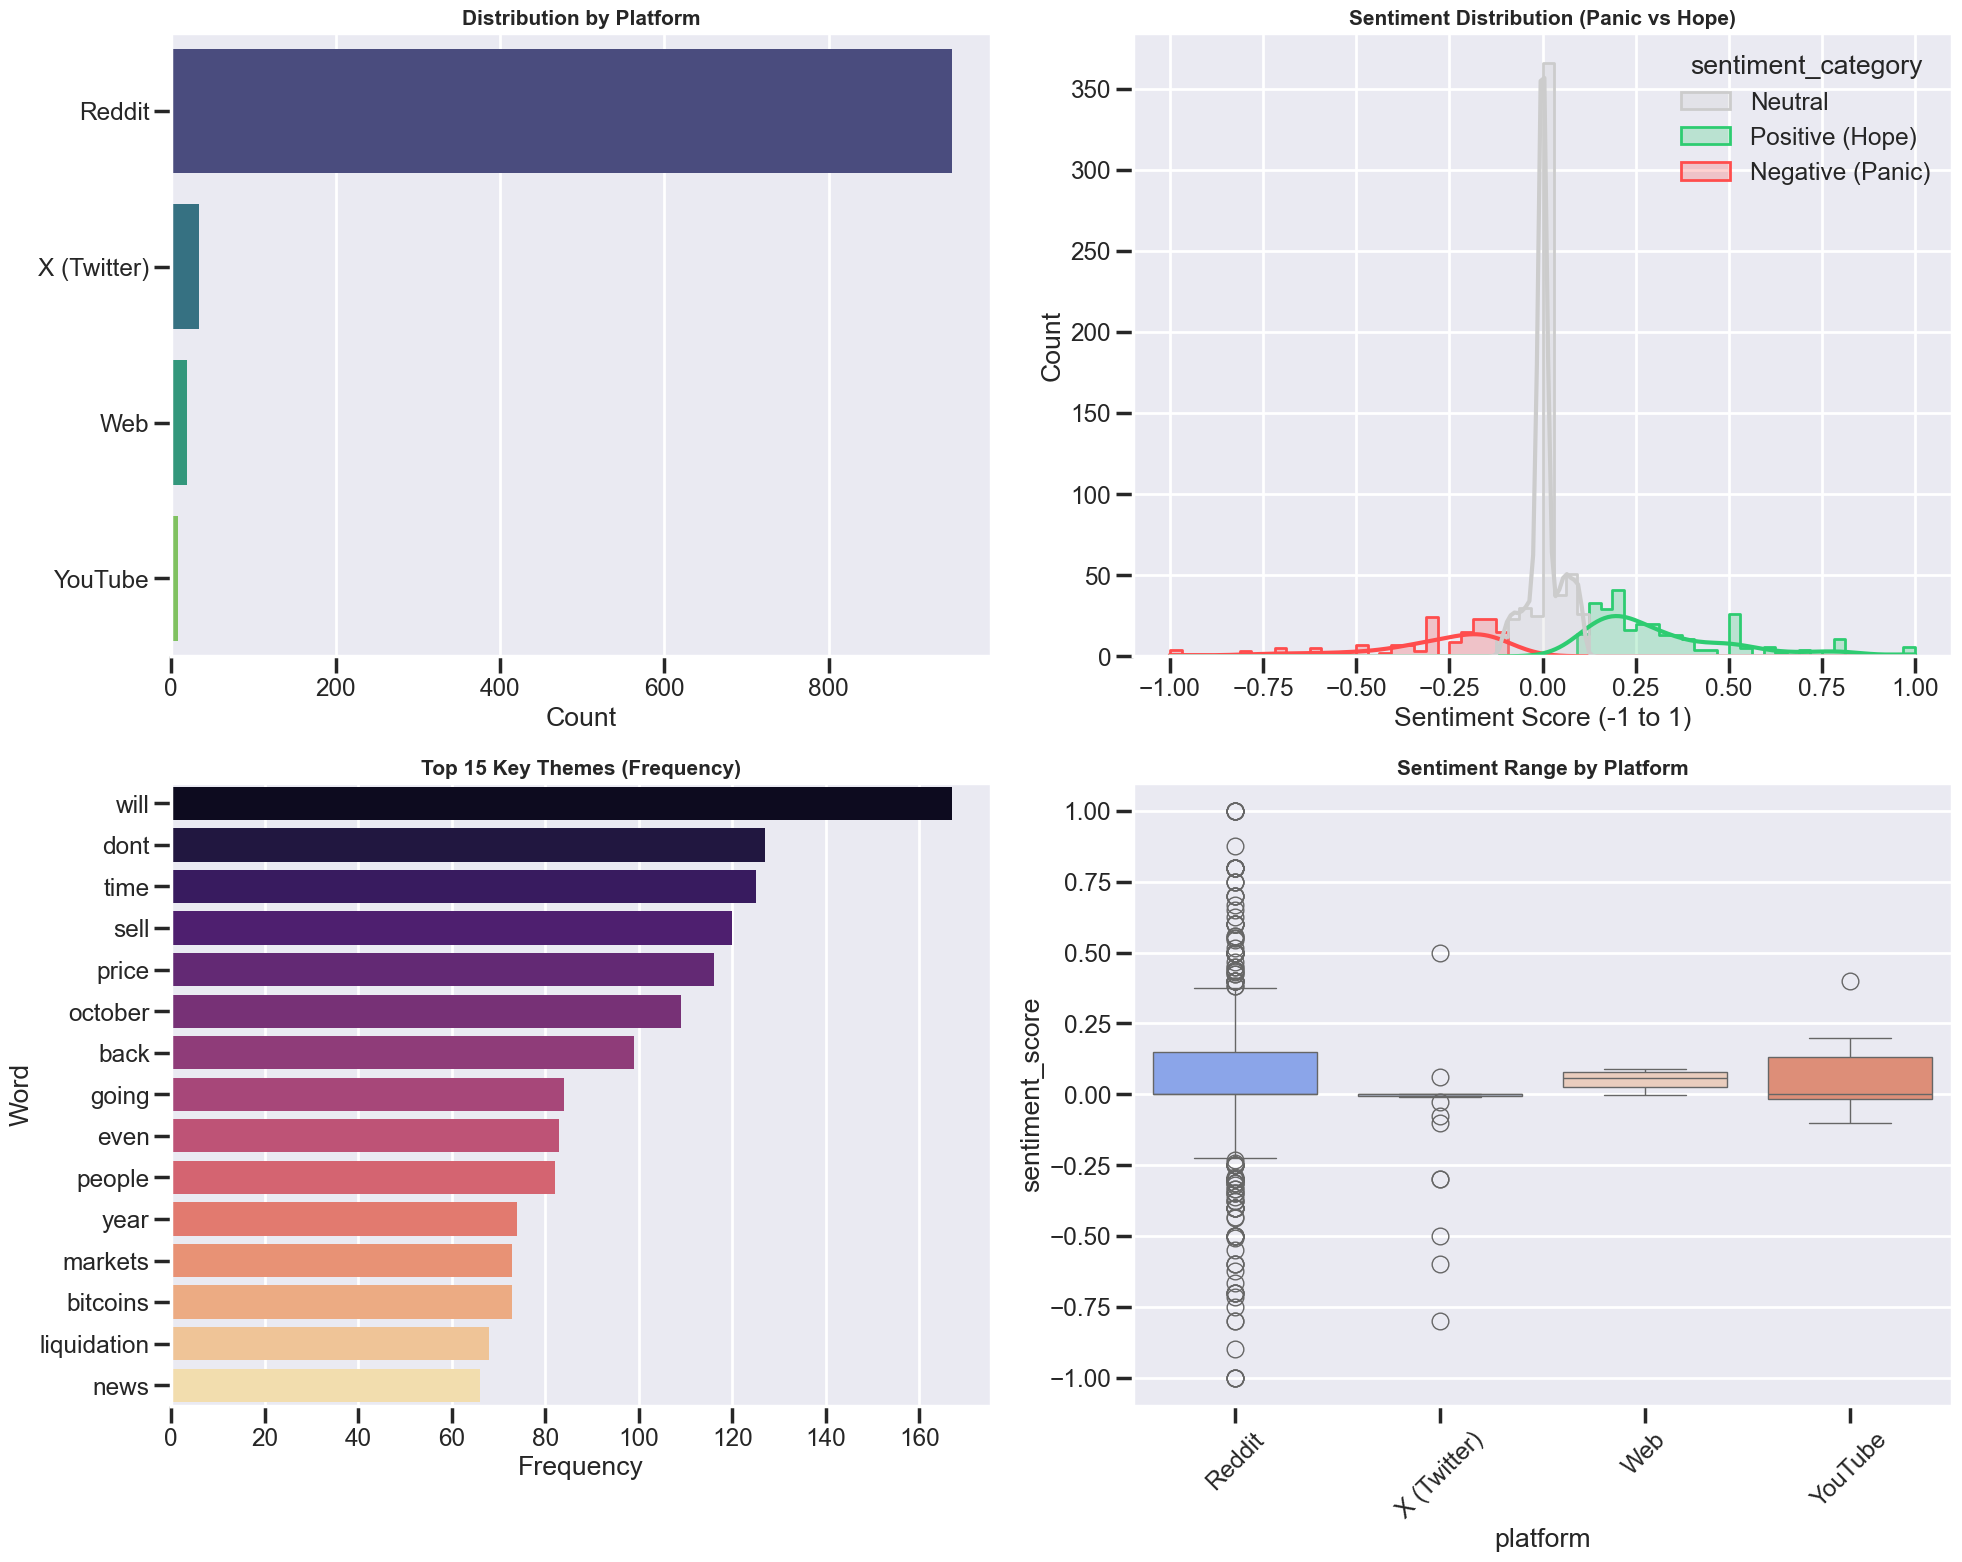

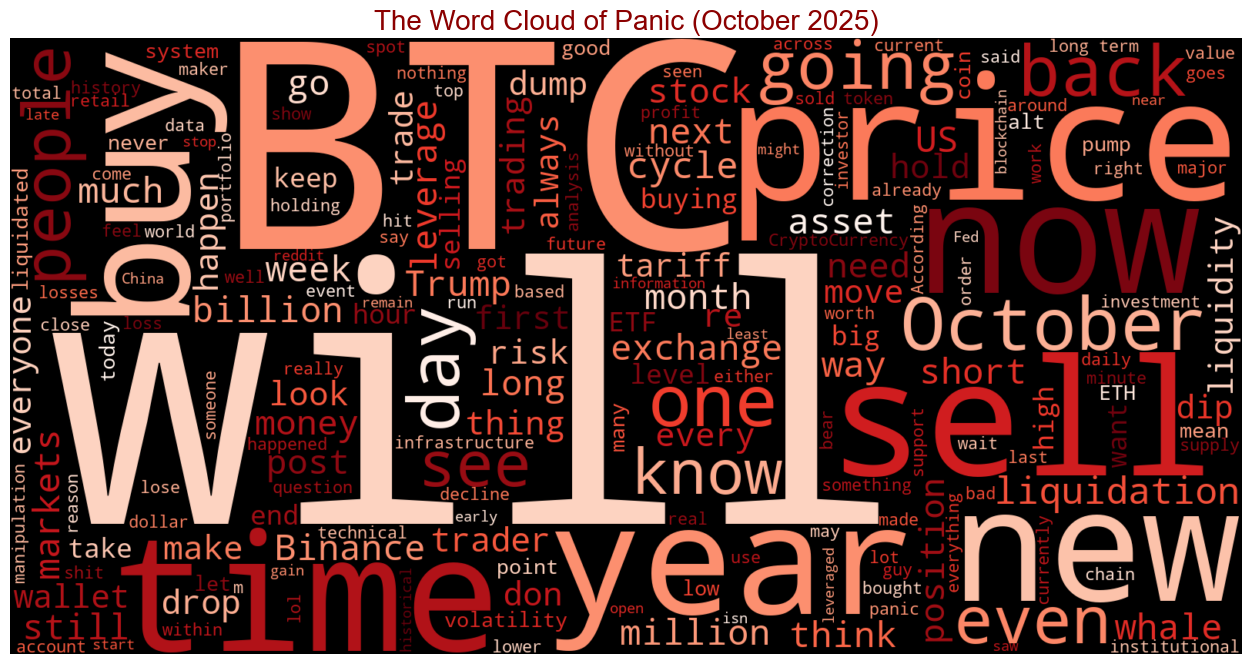

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import os
import glob
import re
from collections import Counter

# ==========================================
# 1. 환경 설정 및 한글 폰트 (필요시)
# ==========================================
# 시각화 스타일 설정
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("poster", font_scale=0.8)

# 경로 설정
data_folder = r"C:\junwoo\AI_Project_01_Team6\data"
output_img_folder = os.path.join(data_folder, "analysis_results")

if not os.path.exists(output_img_folder):
    os.makedirs(output_img_folder)

# ==========================================
# 2. 가장 최신 데이터 파일 자동 로드
# ==========================================
def load_latest_data():
    # SNS_DEEP_DIVE로 시작하는 모든 CSV 찾기
    files = glob.glob(os.path.join(data_folder, "SNS_DEEP_DIVE*.csv"))
    if not files:
        # 혹시 확장 파일이 있다면 대체
        files = glob.glob(os.path.join(data_folder, "*EXPANDED*.csv"))
    
    if not files:
        print("❌ 분석할 데이터 파일이 없습니다.")
        return None
    
    # 가장 최근에 수정된 파일 선택
    latest_file = max(files, key=os.path.getmtime)
    print(f"📂 분석 대상 파일 로드: {os.path.basename(latest_file)}")
    return pd.read_csv(latest_file)

df = load_latest_data()

if df is not None and not df.empty:
    print(f"✅ 총 데이터 개수: {len(df)}개")
    
    # 텍스트 전처리 (NaN 제거 및 문자열 변환)
    df['content'] = df['content'].fillna('').astype(str)
    
    # ==========================================
    # 3. 감성 분석 (Sentiment Analysis)
    # ==========================================
    print("🧠 텍스트 감성 분석 수행 중 (TextBlob)...")
    
    def get_sentiment(text):
        # 영문 텍스트 기준 Polarity (-1: 부정 ~ +1: 긍정)
        return TextBlob(text).sentiment.polarity

    df['sentiment_score'] = df['content'].apply(get_sentiment)
    
    # 감성 카테고리 분류
    def categorize_sentiment(score):
        if score < -0.1: return 'Negative (Panic)'
        elif score > 0.1: return 'Positive (Hope)'
        else: return 'Neutral'

    df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

    # ==========================================
    # 4. 시각화 대시보드 생성 (4-in-1)
    # ==========================================
    print("🎨 시각화 차트 생성 중...")
    
    fig = plt.figure(figsize=(20, 16))
    
    # [1] 플랫폼별 데이터 분포 (Bar Chart)
    ax1 = fig.add_subplot(2, 2, 1)
    sns.countplot(data=df, y='platform', order=df['platform'].value_counts().index, palette='viridis', ax=ax1)
    ax1.set_title('Distribution by Platform', fontsize=15, fontweight='bold')
    ax1.set_xlabel('Count')
    ax1.set_ylabel('')

    # [2] 감성 점수 분포 (Histogram & KDE) - "공포의 파도"
    ax2 = fig.add_subplot(2, 2, 2)
    sns.histplot(data=df, x='sentiment_score', hue='sentiment_category', 
                 kde=True, element="step", palette={'Negative (Panic)': '#ff4d4d', 'Neutral': '#cccccc', 'Positive (Hope)': '#2ecc71'}, ax=ax2)
    ax2.set_title('Sentiment Distribution (Panic vs Hope)', fontsize=15, fontweight='bold')
    ax2.set_xlabel('Sentiment Score (-1 to 1)')
    
    # [3] 주요 키워드 Top 15 (Horizontal Bar)
    ax3 = fig.add_subplot(2, 2, 3)
    
    # 불용어 처리 및 단어 추출
    stop_words = set(STOPWORDS)
    custom_stops = {'https', 'co', 't', 's', 'http', 'www', 'com', 'u', 'amp', 'crypto', 'bitcoin', 'market', 'crash'} 
    stop_words.update(custom_stops)
    
    all_text = " ".join(df['content'])
    # 알파벳만 남기기
    clean_text = re.sub(r'[^a-zA-Z\s]', '', all_text).lower()
    words = [w for w in clean_text.split() if w not in stop_words and len(w) > 3]
    
    word_counts = Counter(words).most_common(15)
    words_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])
    
    sns.barplot(data=words_df, x='Frequency', y='Word', palette='magma', ax=ax3)
    ax3.set_title('Top 15 Key Themes (Frequency)', fontsize=15, fontweight='bold')

    # [4] 플랫폼별 감성 차이 (Box Plot)
    ax4 = fig.add_subplot(2, 2, 4)
    sns.boxplot(data=df, x='platform', y='sentiment_score', palette='coolwarm', ax=ax4)
    ax4.set_title('Sentiment Range by Platform', fontsize=15, fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    
    # 이미지 저장
    save_path_dashboard = os.path.join(output_img_folder, "Dashboard_Sentiment_Analysis.png")
    plt.savefig(save_path_dashboard, dpi=300)
    print(f"💾 대시보드 저장 완료: {save_path_dashboard}")
    
    # ==========================================
    # 5. 워드클라우드 생성 (별도 이미지)
    # ==========================================
    print("☁️ 워드클라우드 생성 중...")
    try:
        wc = WordCloud(width=1600, height=800, 
                      background_color='black', 
                      colormap='Reds', # 공포 분위기를 위해 붉은색 계열
                      stopwords=stop_words,
                      max_words=200).generate(all_text)
        
        plt.figure(figsize=(16, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title('The Word Cloud of Panic (October 2025)', fontsize=20, color='darkred')
        
        save_path_wc = os.path.join(output_img_folder, "WordCloud_Panic.png")
        plt.savefig(save_path_wc, dpi=300)
        print(f"💾 워드클라우드 저장 완료: {save_path_wc}")
        
    except Exception as e:
        print(f"워드클라우드 생성 중 오류: {e}")

    # ==========================================
    # 6. 결과 요약 출력
    # ==========================================
    print("\n" + "="*50)
    print("📢 [분석 요약]")
    print(f"1. 전체 데이터 평균 감성 점수: {df['sentiment_score'].mean():.4f}")
    print("   (점수가 0보다 낮으면 부정/공포, 높으면 긍정/희망)")
    print("\n2. 감성 분포:")
    print(df['sentiment_category'].value_counts())
    print("\n3. 가장 많이 언급된 단어 Top 5:")
    for w, f in word_counts[:5]:
        print(f"   - {w}: {f}회")
    print("="*50)
    
    plt.show()

else:
    print("분석할 데이터가 비어있습니다.")

In [7]:
print("일단 금요일은 여기까지")

일단 금요일은 여기까지
